In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('./sms.csv')

# 检查数据集的类别分布
print(df['label'].value_counts())

# 拆分数据集，确保每个分割中都有足够的正负样本
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=11, stratify=df['label'])

# 特征提取
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# 初始化逻辑回归分类器
classifier = LogisticRegression(max_iter=1000)

# 训练模型
classifier.fit(X_train, y_train)

# 交叉验证
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(classifier, X_train, y_train, cv=skf)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

# 预测
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# 打印分类报告和混淆矩阵
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))
print(confusion_matrix(y_test, y_pred))

# 计算ROC曲线和AUC
if (y_test == 'spam').any():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='spam')
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %s' % roc_auc)

    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("No positive samples in the test set.")


0    4827
1     747
Name: label, dtype: int64
Accuracies: [0.95964126 0.95964126 0.95627803 0.95179372 0.95286195]
Mean accuracy: 0.9560432425903278
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.98      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[964   2]
 [ 30 119]]
No positive samples in the test set.


In [4]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.9905699587084547
Recall: 0.6789355742296919


In [6]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1 score: %s' % np.mean(f1s))

F1 score: 0.8052054628290349


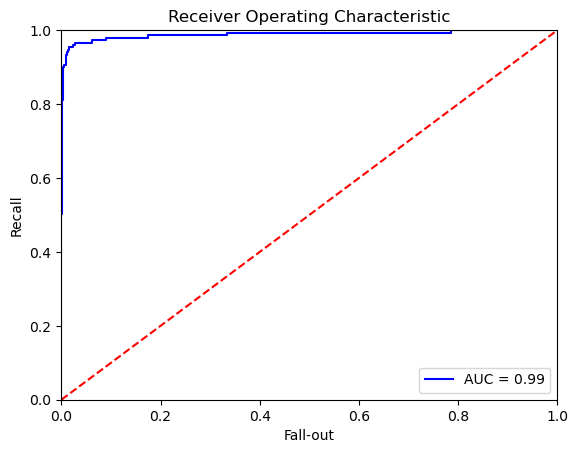

In [8]:
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()